In [1]:
import pandas as pd
import re
import numpy as np
import scipy
import itertools
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist
from collections import Counter
from random import choice

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('LGBT_labelling.csv')

training_data = df.sample(frac=0.7, random_state=1)
testing_data = df.drop(training_data.index)

print(f"Jumlah data training: {training_data.shape[0]}")
print(f"Jumlah data testing: {testing_data.shape[0]}")

Jumlah data training: 314
Jumlah data testing: 135


In [3]:
# Training Data
train_unique = (list(set(training_data['tweet'].str.findall("\w+").sum()))) # Temukan semua kata unik di kolom Tweet data training
train_unique_words = len(train_unique)

# Testing Data
test_unique = (list(set(testing_data['tweet'].str.findall("\w+").sum()))) # Temukan semua kata unik di kolom Tweet data testing
test_unique_words = len(test_unique)

print("Unique words in Training Data: {}".format(train_unique_words))
print("Unique words in Test Data: {}".format(test_unique_words))

Unique words in Training Data: 1106
Unique words in Test Data: 648


In [4]:
# Training Data
train_matrix = [] # Membentuk matriks 2D untuk menyimpan semua vektor training_feature

# Test Data
test_matrix = [] # Membentuk matriks 2D untuk menyimpan semua vektor testing_feature

In [5]:
# Data Training : Mengekstrak feature dan menyimpannya ke dalam matriks training_feature
for sentence in training_data['tweet']:
    train_featurevec = []
    word = sentence.split()
    for w in train_unique:
        train_featurevec.append(word.count(w))
    train_matrix.append(train_featurevec)

# Data Testing : Mengekstrak feature dan menyimpannya ke dalam matriks testing_feature
for sentence in testing_data['tweet']:
    test_featurevec = []
    word = sentence.split()
    for w in train_unique:
        test_featurevec.append(word.count(w))
    test_matrix.append(test_featurevec)

In [6]:
print("Shape of Training Matrix: ({0} , {1})".format(len(train_matrix),len(train_matrix[0])))
print("Shape of Test Matrix: ({0} , {1})".format(len(test_matrix),len(test_matrix[0])))

Shape of Training Matrix: (314 , 1106)
Shape of Test Matrix: (135 , 1106)


In [7]:
# Menghitung jarak antara setiap instance testing dengan semua instance training. Mengembalikan vektor jarak 2D.
dists = cdist(test_matrix,train_matrix,'euclidean') 

In [8]:
# Membuat kolom kosong pada data testing untuk Predicted Label.
testing_data['Predicted Label'] = ''
dists.shape

(135, 314)

In [9]:
#Fungsi yang mengambil list dan mengembalikan mode dari list. Jika ada lebih dari satu mode, secara acak akan memilih salah satu.
def get_mode(l):
    counting = Counter(l)
    max_count = max(counting.values())
    return choice([ks for ks in counting if counting[ks] == max_count])


## **K Nearest Neighbors & Performance Measures**

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Membuat struktur umum matriks dari confusion matrix
cmatrix = pd.DataFrame({'Positif': '', 'Negatif': ''},
                       index = ['Prediksi Positif', 'Prediksi Negatif'])

#Initializing lists to be used in plotting later.
acc_list = []
rec_list = []
prec_list = []
f1_list = []

In [11]:
def classifying(trainfeatures,testfeatures):

  X_train = trainfeatures #train_matrix - 2D feature vector
  X_test = testfeatures #test_matrix - 2D feature vector
  y_train = training_data.iloc[:,0].values #trained['label']
  y_test = testing_data.iloc[:,0].values #test['label']

  for k in [1,3,5,7,10,13,15,17,20]:

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
    predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

    accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(y_test, predicted_label)
    class_report = classification_report(y_test, predicted_label)

    macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)
    
    macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    print(confusion_mat)
    print("\nClassification Report for k = {} is:\n".format(k))
    print(class_report)
    print("Accuracy Score for k = {0} is: {1}%".format(k,accuracy_score))
    print("Macroaveraged Recall for k = {0} is: {1}%".format(k,macro_recall))
    print("Macroaveraged Precision for k = {0} is: {1}%".format(k,macro_precision))
    print("Macroaveraged F1-score for k = {0} is: {1}%".format(k,macro_f1))

In [12]:
classifying(train_matrix,test_matrix)



Confusion Matrix for k = 1 is:

[[90  0]
 [45  0]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

     negatif       0.67      1.00      0.80        90
     positif       0.00      0.00      0.00        45

    accuracy                           0.67       135
   macro avg       0.33      0.50      0.40       135
weighted avg       0.44      0.67      0.53       135

Accuracy Score for k = 1 is: 67.0%
Macroaveraged Recall for k = 1 is: 50.0%
Macroaveraged Precision for k = 1 is: 33.0%
Macroaveraged F1-score for k = 1 is: 40.0%


Confusion Matrix for k = 3 is:

[[ 0 90]
 [ 0 45]]

Classification Report for k = 3 is:

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        90
     positif       0.33      1.00      0.50        45

    accuracy                           0.33       135
   macro avg       0.17      0.50      0.25       135
weighted avg       0.11      0.33      0.17       135

A

# **Plotting**

<function matplotlib.pyplot.show(close=None, block=None)>

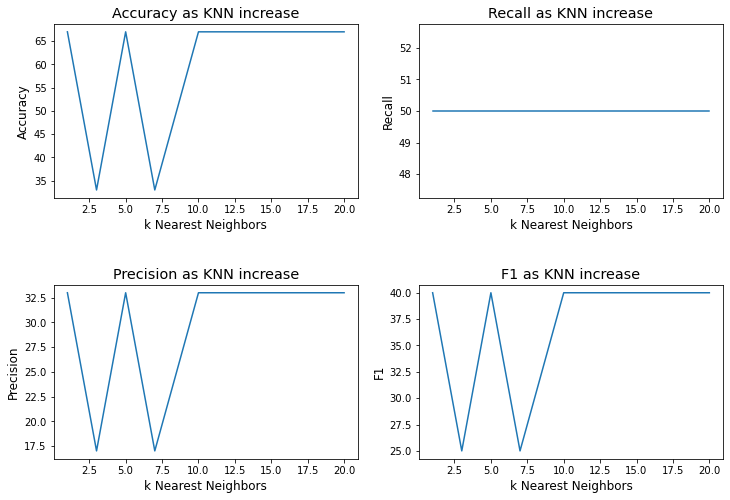

In [13]:
k_ls = [1,3,5,7,10,13,15,17,20] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(k_ls,acc_list)
plt.title("Accuracy as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(k_ls,rec_list)
plt.title("Recall as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(k_ls,prec_list)
plt.title("Precision as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(k_ls,f1_list)
plt.title("F1 as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show